# Preprocessing EDA - Bank Reviews Analysis
## Task 1: Exploratory Data Analysis

This notebook explores the scraped and preprocessed bank review data.
Run each cell one at a time in order.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# If using Jupyter, enable inline plotting (remove if running as script)
%matplotlib inline


In [3]:
# Adjust path if needed (this assumes notebook is in src/notebooks or similar)
data_path = '../data/processed/bank_reviews_cleaned.csv'

df = pd.read_csv(data_path)

print("Dataset Overview:")
print(f"Total Reviews: {len(df):,}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 3 reviews:")
df.head(3)


Dataset Overview:
Total Reviews: 1,346
Columns: ['review', 'rating', 'date', 'bank', 'source', 'review_year', 'review_month', 'review_cleaned']

First 3 reviews:


,review,rating,date,bank,source,review_year,review_month,review_cleaned
0,"WHAT A USELESS APP! Transfers, wallet payments...",1,2025-09-13,Commercial Bank of Ethiopia,Google Play Store,2025,9,"WHAT A USELESS APP! Transfers, wallet payments..."
1,"Most of the time when I try to open the app, i...",2,2025-09-24,Commercial Bank of Ethiopia,Google Play Store,2025,9,"Most of the time when I try to open the app, i..."
2,I use the Commercial Bank of Ethiopia mobile a...,5,2025-08-22,Commercial Bank of Ethiopia,Google Play Store,2025,8,I use the Commercial Bank of Ethiopia mobile a...


In [4]:
print("=== BASIC STATISTICS ===")
print(f"\nTotal reviews: {len(df)}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"\nReviews per bank:")
print(df['bank'].value_counts())

print(f"\nRating distribution:")
rating_stats = df['rating'].value_counts().sort_index()
for rating, count in rating_stats.items():
    percentage = (count / len(df)) * 100
    print(f"{rating} stars: {count} reviews ({percentage:.1f}%)")


=== BASIC STATISTICS ===

Total reviews: 1346
Date range: 2018-11-07 to 2025-11-23

Reviews per bank:
bank
Commercial Bank of Ethiopia    450
Bank of Abyssinia              450
Dashen Bank                    446
Name: count, dtype: int64

Rating distribution:
1 stars: 528 reviews (39.2%)
2 stars: 102 reviews (7.6%)
3 stars: 136 reviews (10.1%)
4 stars: 129 reviews (9.6%)
5 stars: 451 reviews (33.5%)


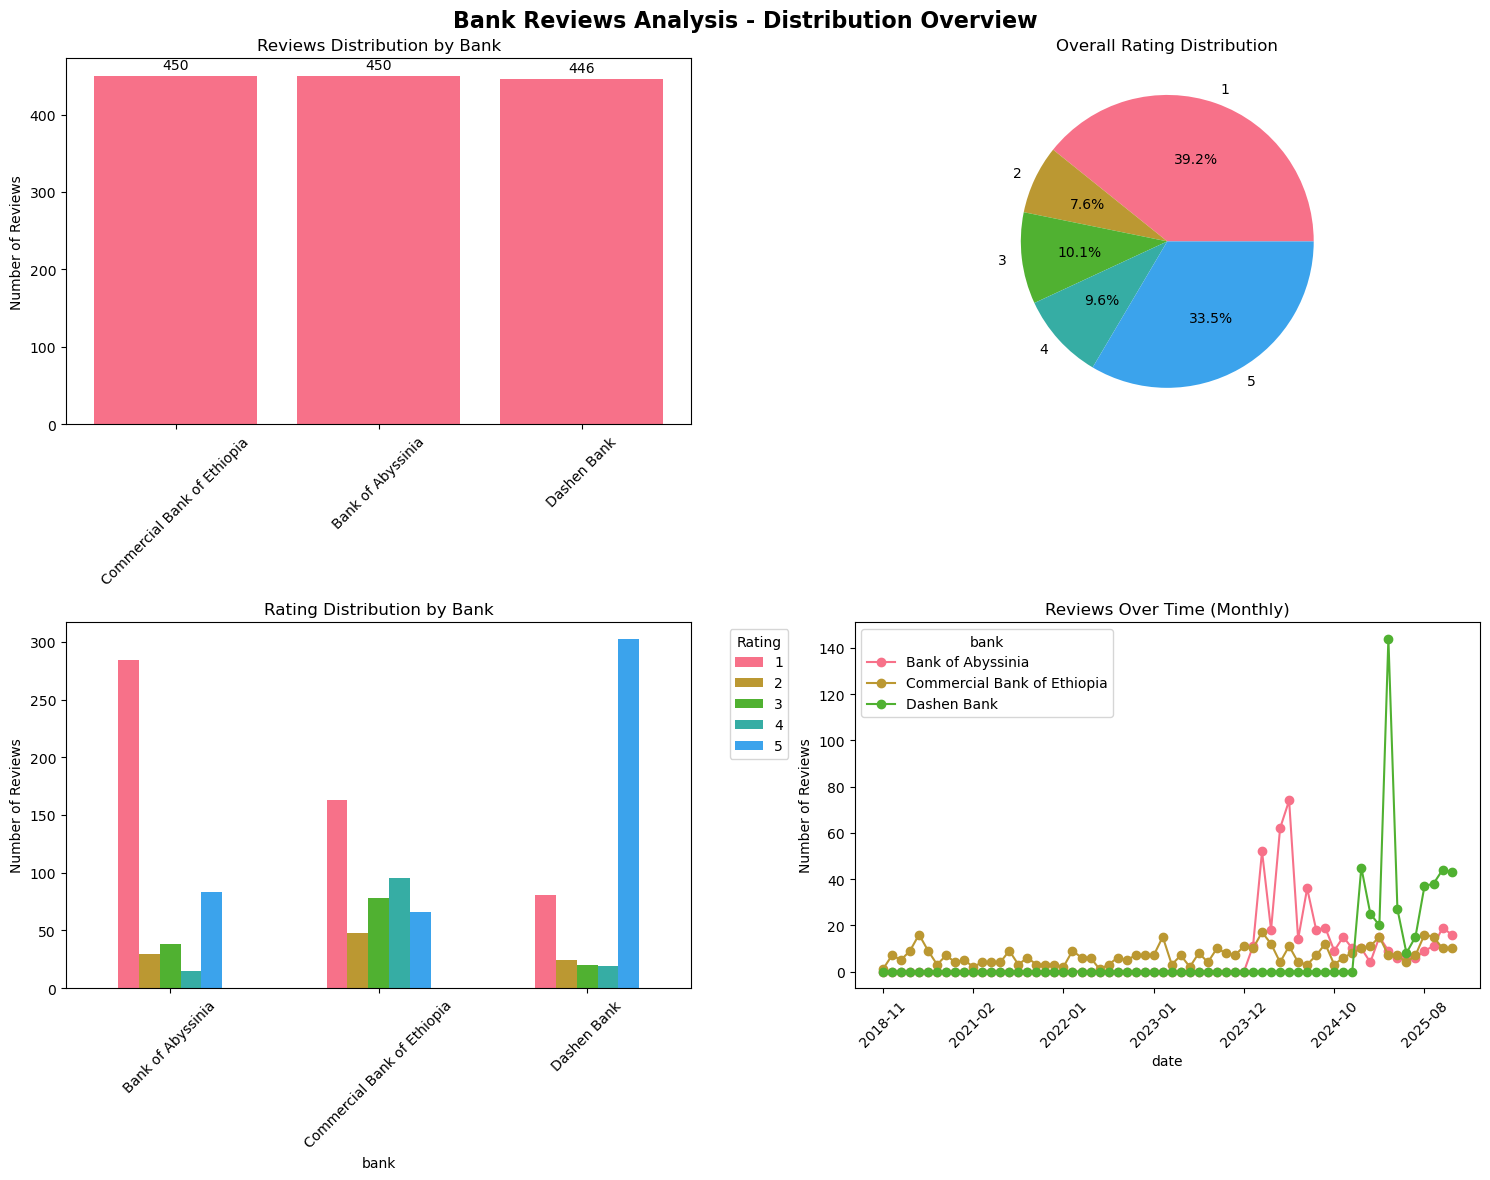

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Bank Reviews Analysis - Distribution Overview', fontsize=16, fontweight='bold')

# Plot 1: Reviews per bank
bank_counts = df['bank'].value_counts()
axes[0,0].bar(bank_counts.index, bank_counts.values)
axes[0,0].set_title('Reviews Distribution by Bank')
axes[0,0].set_ylabel('Number of Reviews')
axes[0,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(bank_counts.values):
    axes[0,0].text(i, v + 5, str(v), ha='center', va='bottom')

# Plot 2: Rating distribution (pie)
rating_counts = df['rating'].value_counts().sort_index()
axes[0,1].pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Overall Rating Distribution')

# Plot 3: Rating distribution by bank
rating_by_bank = pd.crosstab(df['bank'], df['rating'])
rating_by_bank.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Rating Distribution by Bank')
axes[1,0].set_ylabel('Number of Reviews')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 4: Reviews over time (monthly)
df['date'] = pd.to_datetime(df['date'])
monthly_reviews = df.groupby([df['date'].dt.to_period('M'), 'bank']).size().unstack(fill_value=0)
monthly_reviews.index = monthly_reviews.index.astype(str)
monthly_reviews.plot(kind='line', ax=axes[1,1], marker='o')
axes[1,1].set_title('Reviews Over Time (Monthly)')
axes[1,1].set_ylabel('Number of Reviews')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


=== TEXT ANALYSIS ===
Average review length: 165 characters
Longest review: 563 characters
Shortest review: 10 characters


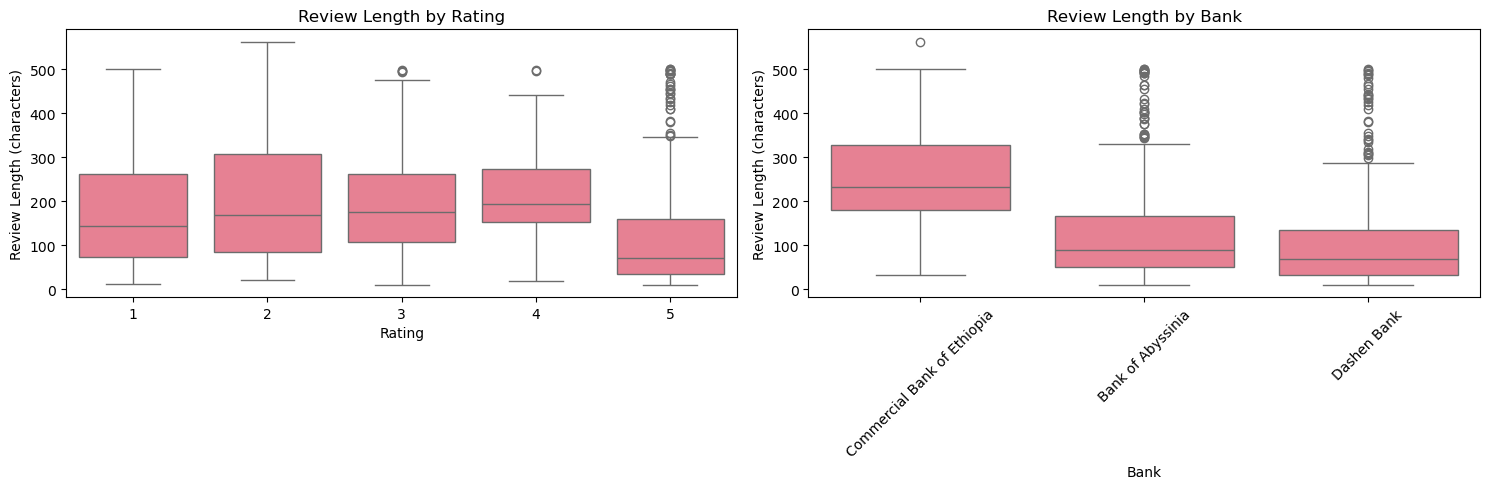

In [6]:
df['review_length'] = df['review_cleaned'].str.len()

print("=== TEXT ANALYSIS ===")
print(f"Average review length: {df['review_length'].mean():.0f} characters")
print(f"Longest review: {df['review_length'].max()} characters")
print(f"Shortest review: {df['review_length'].min()} characters")

# Plot review length by rating and by bank
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df, x='rating', y='review_length', ax=axes[0])
axes[0].set_title('Review Length by Rating')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Review Length (characters)')

sns.boxplot(data=df, x='bank', y='review_length', ax=axes[1])
axes[1].set_title('Review Length by Bank')
axes[1].set_xlabel('Bank')
axes[1].set_ylabel('Review Length (characters)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


=== KEY INSIGHTS ===

Average Rating by Bank:
  Dashen Bank: 3.98 ⭐
  Commercial Bank of Ethiopia: 2.67 ⭐
  Bank of Abyssinia: 2.07 ⭐

Sentiment Distribution by Bank (%):
sentiment_category           Negative  Neutral  Positive
bank                                                    
Bank of Abyssinia                69.8     11.8      18.4
Commercial Bank of Ethiopia      46.9     38.4      14.7
Dashen Bank                      23.5      8.7      67.7


<Figure size 1000x600 with 0 Axes>

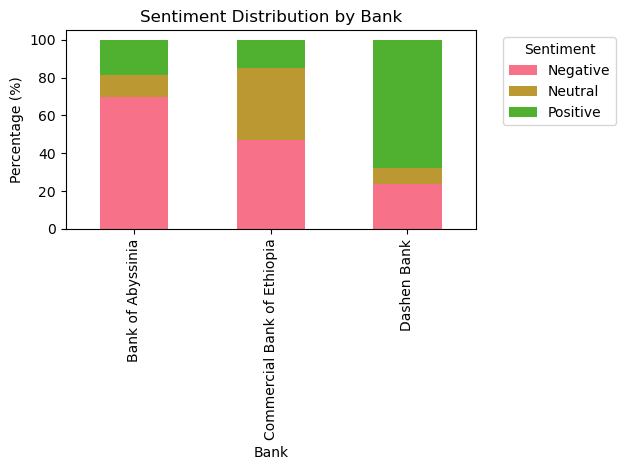

In [7]:
print("=== KEY INSIGHTS ===")

# Average rating per bank
avg_rating = df.groupby('bank')['rating'].mean().sort_values(ascending=False)
print("\nAverage Rating by Bank:")
for bank, rating in avg_rating.items():
    print(f"  {bank}: {rating:.2f} ⭐")

# Define simple sentiment categories from rating
positive_threshold = 4
negative_threshold = 2

df['sentiment_category'] = pd.cut(df['rating'],
                                 bins=[0, negative_threshold, positive_threshold, 5],
                                 labels=['Negative', 'Neutral', 'Positive'])

sentiment_by_bank = pd.crosstab(df['bank'], df['sentiment_category'], normalize='index') * 100

print("\nSentiment Distribution by Bank (%):")
print(sentiment_by_bank.round(1))

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_by_bank.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Percentage (%)')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [8]:
print("=== SAMPLE REVIEWS ===")

# Sample positive reviews (5-star)
print("\n📈 Sample Positive Reviews (5⭐):")
positive_samples = df[df['rating'] == 5].sample(min(3, len(df[df['rating'] == 5])), random_state=42)
for idx, row in positive_samples.iterrows():
    print(f"\nBank: {row['bank']}")
    print(f"Review: {row['review_cleaned'][:200]}...")

# Sample negative reviews (1-star)
print("\n\n📉 Sample Negative Reviews (1⭐):")
negative_samples = df[df['rating'] == 1].sample(min(3, len(df[df['rating'] == 1])), random_state=42)
for idx, row in negative_samples.iterrows():
    print(f"\nBank: {row['bank']}")
    print(f"Review: {row['review_cleaned'][:200]}...")


=== SAMPLE REVIEWS ===

📈 Sample Positive Reviews (5⭐):

Bank: Dashen Bank
Review: best ever digital banking sector essay for understanding ,smart and convince for using...

Bank: Commercial Bank of Ethiopia
Review: This is the best service, it makes everything easy for you, so why not download this app and if you are satisfied with it, give it five stars, it deserves it. 👍♥️❤️...

Bank: Dashen Bank
Review: easy to use and the best one...


📉 Sample Negative Reviews (1⭐):

Bank: Commercial Bank of Ethiopia
Review: All those service interruptions... , When you update it stops working and to start using an new appliance you need to go to the bank to activate it... uff......

Bank: Bank of Abyssinia
Review: The poorest mobile banking survice ever. Only error reports frequently...

Bank: Commercial Bank of Ethiopia
Review: the app constantly glitches and won't stop loading despite having a decent connection and a cleared cache. telebirr is way better...


## Task 1 Summary

- ✅ Data Collection: COMPLETED  
- ✅ Data Preprocessing: COMPLETED  
- ✅ Exploratory Analysis: COMPLETED

**Key Findings**
- Total processed reviews: `{len(df)}`  
- Data quality: Excellent (high retention)  
- Rating distribution: Polarized (many 1★ and 5★ reviews)

**Next Steps**
1. Advanced sentiment analysis with DistilBERT (Task 2)  
2. Thematic analysis and keyword extraction  
3. Insert cleaned data into PostgreSQL for Task 3
